In [1]:
# pip install requests_toolbelt

In [1]:
from flask import Flask, render_template, request, url_for
from tensorflow.keras.models import load_model
import noisereduce as nr
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import io
import numpy as np
import soundfile
from werkzeug.utils import secure_filename
from pydub.utils import make_chunks

# from requests_toolbelt.multipart import decoder


In [2]:
host_addr = "0.0.0.0"
port_num = "5050"
sr = 16000

In [3]:
def add_whitenoise(sig):
  wn = np.random.randn(len(sig))
  wn_1000=wn/1000*np.random.randint(1,6)
  sig_wn = sig + wn_1000
  return sig_wn

def shift_audio(sig, shift):
  sig_roll = np.roll(sig, shift)
  return sig_roll

def stratch_audio(sig, rate):
  input_length = len(sig)
  sig = librosa.effects.time_stretch(sig, rate)
  if len(sig)>input_length:
      sig = sig[:input_length]
  else:
      sig = np.pad(sig, (0, max(0, input_length - len(sig))), "constant")
  return sig

In [4]:
def file_transform(sig):
    global sr
    sig_lst = []
    
    rate=np.random.randint(3, 25) / 10
    shift=np.random.randint(-9, 9)*sr
    
    sig=nr.reduce_noise(y=sig, sr=sr)

    sig_wn=add_whitenoise(sig)

    sig_strech1 = stratch_audio(sig_wn, rate=rate)

    sig_roll = shift_audio(sig_strech1, shift=shift)

    return sig_roll

In [ ]:
def gen_mfcc(sig):
      
  # 상수 정의
  sample_rate=16000
  length = len(sig)/sample_rate   # 음악의 길이는 음파 길이(len(sig)) / sr
  n_fft=int(sample_rate*0.025)
  hop_length=int(sample_rate*0.01)
  r=length/9  # 분모를 조절하면 몇초동안 재생되는지 조절 가능

  # 진폭 정규화
  sig=(sig + sig.mean()) * 1/max(np.abs(sig))   

  # stft 분석을 하는 코드
  stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length) 

  # 음원 데이터의 길이 정규화
  p_stft=librosa.phase_vocoder(stft, rate=r, hop_length=hop_length)

  mel_spec=librosa.feature.melspectrogram(S=p_stft, sr=sample_rate, n_mels=128, hop_length=hop_length)

  log_M=librosa.amplitude_to_db(mel_spec)

  # mfcc를 이용한 feature값 계산. n_mfcc는 추출하고자 하는 mfcc의 갯수
  mfcc = librosa.feature.mfcc(S=log_M, n_mfcc=30, sr=sample_rate)

  return mfcc

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
127.0.0.1 - - [14/Jun/2022 11:37:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:37:59] "GET /static/img/mask2.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Jun/2022 11:38:05] "POST /set HTTP/1.1" 200 -
c:\ProgramData\Anaconda3\envs\kdig\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
c:\ProgramData\Anaconda3\envs\kdig\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)
C:\Users\CJ\AppData\Local\Temp\ipykernel_17524\1449202718.py:13: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sig = librosa.effects.time_stretch(sig, rate)
C:\Users\CJ\AppData\Local\Temp\ipykernel_17524\1449

29760
29760
29760


127.0.0.1 - - [14/Jun/2022 11:38:09] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:09] "GET /static/img/wav/signal.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:09] "GET /static/img/mfcc/mfcc.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:10] "GET /static/audio/blob.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:38:10] "GET /static/audio/aug/blob_aug_1.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:38:10] "GET /static/audio/aug/blob_aug_2.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:38:10] "GET /static/audio/aug/blob_aug_3.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:38:13] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2022 11:38:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:22] "GET /static/img/mask2.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Jun/2022 11:38:30] "POST /set HTTP/1.1" 200 -
c:\ProgramData\Anaconda3\envs\kdig\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread i

40320
40320
40320


127.0.0.1 - - [14/Jun/2022 11:38:35] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:35] "GET /static/img/wav/signal.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:35] "GET /static/img/mfcc/mfcc.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:38:36] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2022 11:39:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:39:27] "GET /static/img/mask2.png HTTP/1.1" 304 -
127.0.0.1 - - [14/Jun/2022 11:39:34] "POST /set HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:39:36] "GET /favicon.ico HTTP/1.1" 404 -
c:\ProgramData\Anaconda3\envs\kdig\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
c:\ProgramData\Anaconda3\envs\kdig\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.

48960
48960


C:\Users\CJ\AppData\Local\Temp\ipykernel_17524\1449202718.py:13: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sig = librosa.effects.time_stretch(sig, rate)


48960


127.0.0.1 - - [14/Jun/2022 11:39:48] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/img/wav/signal.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/img/mfcc/mfcc.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/audio/blob.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/audio/aug/blob_aug_1.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/audio/aug/blob_aug_2.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:48] "GET /static/audio/aug/blob_aug_3.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:50] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2022 11:39:53] "GET /static/audio/aug/blob_aug_1.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:56] "GET /static/audio/aug/blob_aug_3.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:39:59] "GET /static/audio/aug/blob_aug_2.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:40:31] "POST /set HTTP/1.1" 200 -
12

88320
88320


C:\Users\CJ\AppData\Local\Temp\ipykernel_17524\1449202718.py:13: FutureWarning: Pass rate=1.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sig = librosa.effects.time_stretch(sig, rate)


88320


127.0.0.1 - - [14/Jun/2022 11:40:41] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:40:41] "GET /static/img/wav/signal.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:40:41] "GET /static/img/mfcc/mfcc.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Jun/2022 11:40:41] "GET /static/audio/blob.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:40:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Jun/2022 11:40:51] "GET /static/audio/blob.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:40:54] "GET /static/audio/aug/blob_aug_1.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:40:58] "GET /static/audio/aug/blob_aug_3.wav HTTP/1.1" 206 -
127.0.0.1 - - [14/Jun/2022 11:41:01] "GET /static/audio/aug/blob_aug_2.wav HTTP/1.1" 206 -


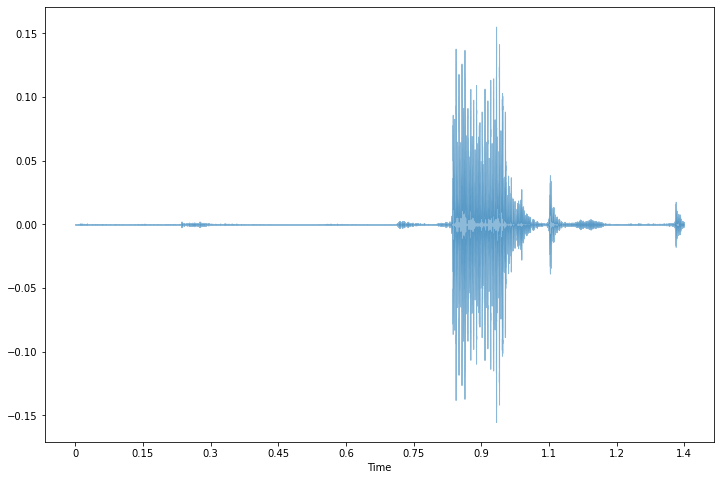

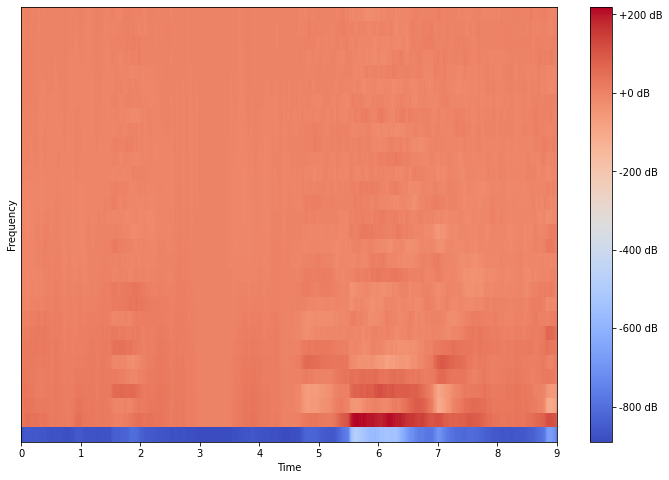

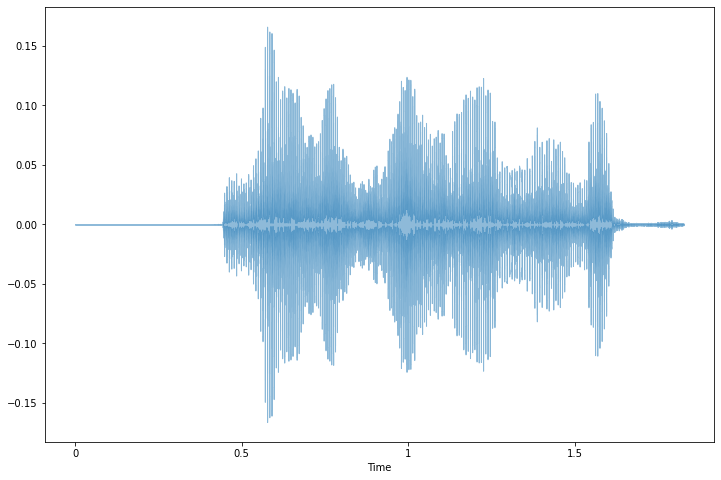

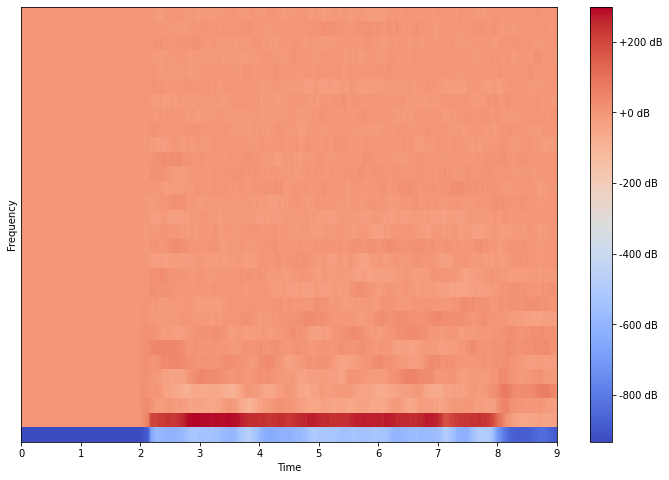

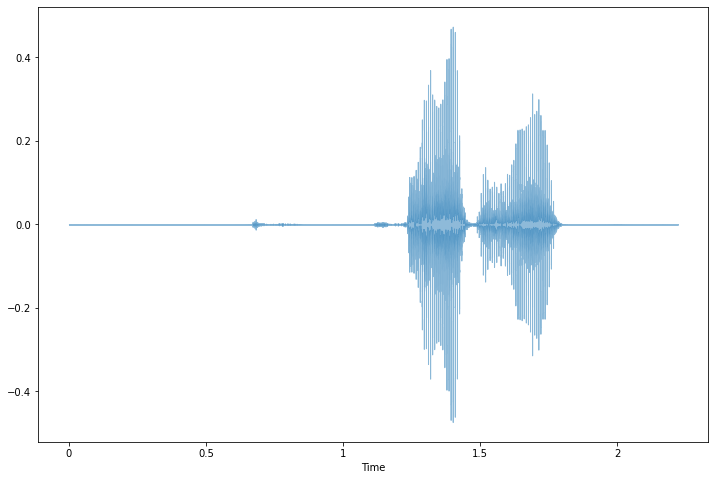

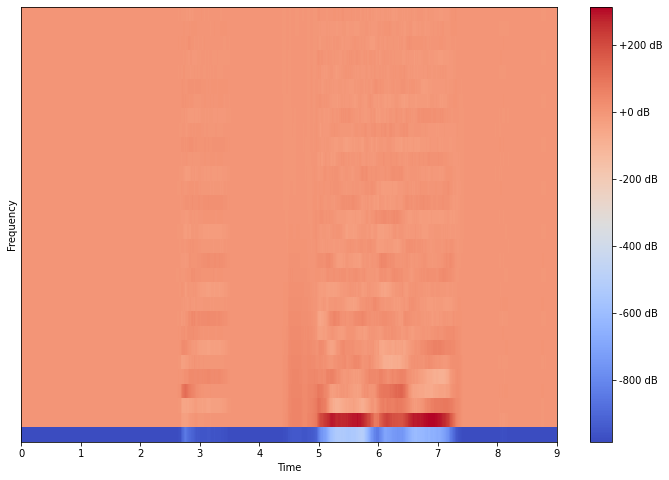

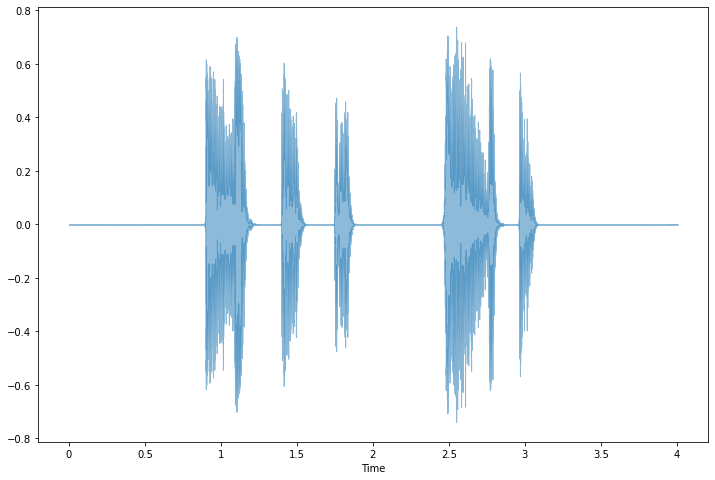

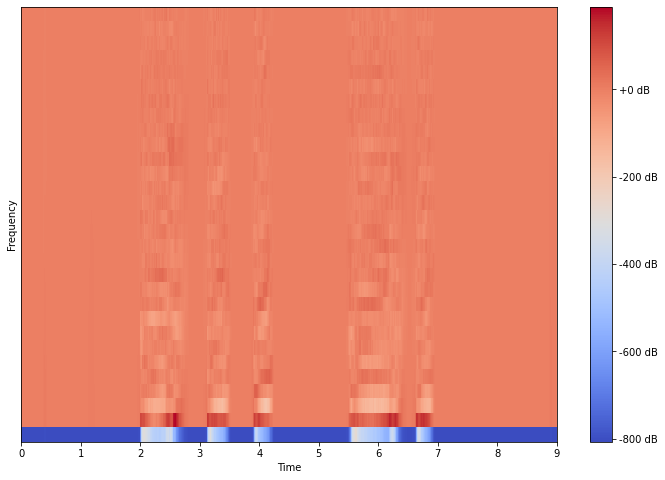

In [7]:
app = Flask(__name__)

filename = ""

# 웹 페이지 접속시 메인 화면
@app.route('/',  methods=['GET'])
def main_loading():
    mask = "img/mask2.png"
    return render_template("main.html", mask = mask)

@app.route('/selectNum',  methods=['GET'])
def select_number():
    covid1 = "img/coronavirus1.png"
    covid2 = "img/coronavirus2.png"
    covid3 = "img/coronavirus3.png"

    return render_template("select_number.html", coivd1=covid1, coivd2=covid2, coivd3=covid3 )

@app.route('/set',  methods=['POST'])
def set():
    global filename 
    if 'audio_blob' in request.files:
        file = request.files['audio_blob']
        # Write the data to a file.
        
        filename = secure_filename(file.filename)
        cnt = 0
        if filename in os.listdir('./static/audio/'):
            while filename +str(cnt) in os.listdir('./static/audio/'):
                cnt += 1
            filename = filename +str(cnt)
        filepath = "./static/audio/" + filename
        file.save(filepath + ".wav")

    return "good"

# 파일 업로드 및 해당 파일 화면에 출력
@app.route('/result',  methods=['POST'])
def upload_file():

    if 'test_number' in request.form.keys():
        test_number = request.form["test_number"]
        
    elif 'age' in request.form.keys():
        filename = "blob"
        # 파일 정보 받아오기
        age = request.form["age"]
        gender = request.form["gender"]
        healthy = request.form.getlist("healty")
        
        # 입력정보로 feature 생성
        age=int(age)

        if gender=='male':
            man=1
        else:
            man=0

        if 'respiratory_condition' in healthy:
            res=1
        else:
            res=0

        if 'fever_muscle_pain' in healthy:
            fever=1
        else: 
            fever=0
    
        feature=np.array([man, res, fever])

        # 음원 로드하여 테스트 데이터 생성
        sig, sr = librosa.load('./static/audio/' + "blob" + ".wav", sr = 16000)
        sig=nr.reduce_noise(y=sig, sr=sr, stationary=False)
        mfcc=gen_mfcc(sig)
        test_mfcc=mfcc[:, :901]

        # sig 이미지 생성
        plt.figure(figsize=(12,8))
        librosa.display.waveshow(sig, alpha = 0.5)
        plt.savefig('./static/img/wav/signal.png')

        # mfcc 이미지 생성
        fig = plt.figure(figsize = (12,8))
        librosa.display.specshow(test_mfcc, 
                                sr=sr, 
                                hop_length=int(16000*0.01),
                                x_axis='time',)
        plt.xlabel("Time")
        plt.ylabel("Frequency")
        plt.colorbar(format='%+2.0f dB')
        plt.savefig('./static/img/mfcc/mfcc.png')

        # augmentation file 생성
        for i in range(3):
            aug = file_transform(sig)
            print(len(aug))
            soundfile.write("./static/audio/aug/" + filename + "_aug_" + str(i + 1) + ".wav", aug, 16000)

        if age>=15 and age<=65 :
            model=load_model('./model/1565_model.h5')
            y_train_pred=model.predict([test_mfcc.reshape(1,30,901), feature.reshape(1,3)])
            if y_train_pred>=0.5:
                yhat=1
            else:
                yhat=0

        else :
            model=load_model('./model/other_model.h5')
            y_train_pred=model.predict([test_mfcc.reshape(1,30,901), feature.reshape(1,3)])
            if y_train_pred>=0.5:
                yhat=1
            else:
                yhat=0
        aug1 = "audio/aug/" + filename + "_aug_1"  + ".wav"
        aug2 = "audio/aug/" + filename + "_aug_2"  + ".wav"
        aug3 = "audio/aug/" + filename + "_aug_3"  + ".wav"
        wav_img = "img/wav/signal.png"
        mfcc_img = "img/mfcc/mfcc.png"

        return render_template("result.html", age=age, gender = gender, healthy=healthy,
                                pred = y_train_pred[0][0], yhat=yhat,
                                 audio_1 = aug1, audio_2 = aug2, audio_3 = aug3,
                                    audio_or = "audio/" + filename + ".wav", wav_img = wav_img, mfcc_img = mfcc_img)




if __name__ == "__main__":
    app.run()  

NameError: name 'aug' is not defined